In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 10)

In [2]:
df = pd.read_csv('data/treasury_rates.csv')

In [3]:
df

,DATE,DGS6MO,DGS1,DGS2,DGS5,DGS10,DGS30
0,1986-02-18,7.42,7.56,7.96,8.28,8.64,8.89
1,1986-02-19,7.51,7.67,8.06,8.37,8.7,8.92
2,1986-02-20,7.54,7.68,8.05,8.39,8.67,8.88
3,1986-02-21,7.42,7.56,7.93,8.24,8.48,8.73
4,1986-02-24,7.41,7.53,7.86,8.2,8.39,8.61
...,...,...,...,...,...,...,...
9188,2021-05-07,0.04,0.05,0.14,0.77,1.6,2.28
9189,2021-05-10,0.04,0.05,0.16,0.8,1.63,2.32
9190,2021-05-11,0.04,0.05,0.16,0.8,1.64,2.35
9191,2021-05-12,0.04,0.05,0.16,0.87,1.69,2.4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9193 entries, 0 to 9192
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    9193 non-null   object
 1   DGS6MO  9193 non-null   object
 2   DGS1    9193 non-null   object
 3   DGS2    9193 non-null   object
 4   DGS5    9193 non-null   object
 5   DGS10   9193 non-null   object
 6   DGS30   9193 non-null   object
dtypes: object(7)
memory usage: 502.9+ KB


* Date needs to be set to datetime
* Other values should be floats.  I suspect this is because the null values are '.'

In [5]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9193 entries, 0 to 9192
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    9193 non-null   datetime64[ns]
 1   DGS6MO  9193 non-null   object        
 2   DGS1    9193 non-null   object        
 3   DGS2    9193 non-null   object        
 4   DGS5    9193 non-null   object        
 5   DGS10   9193 non-null   object        
 6   DGS30   9193 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 502.9+ KB


In [7]:
df.head(20)

,DATE,DGS6MO,DGS1,DGS2,DGS5,DGS10,DGS30
0,1986-02-18,7.42,7.56,7.96,8.28,8.64,8.89
1,1986-02-19,7.51,7.67,8.06,8.37,8.7,8.92
2,1986-02-20,7.54,7.68,8.05,8.39,8.67,8.88
3,1986-02-21,7.42,7.56,7.93,8.24,8.48,8.73
4,1986-02-24,7.41,7.53,7.86,8.2,8.39,8.61
5,1986-02-25,7.43,7.59,7.89,8.21,8.4,8.6
6,1986-02-26,7.42,7.57,7.88,8.07,8.36,8.54
7,1986-02-27,7.36,7.48,7.72,7.91,8.15,8.32
8,1986-02-28,7.36,7.43,7.71,7.91,8.13,8.27
9,1986-03-03,7.3,7.35,7.55,7.76,7.99,8.16


* The missing data here is from Christmas and New Years, which makes sense since the market is closed.
* I'll fill in the missing data from the value of the previous day.

In [8]:
df = df.replace('.', np.nan).ffill(axis=0)

In [9]:
df

,DATE,DGS6MO,DGS1,DGS2,DGS5,DGS10,DGS30
0,1986-02-18,7.42,7.56,7.96,8.28,8.64,8.89
1,1986-02-19,7.51,7.67,8.06,8.37,8.7,8.92
2,1986-02-20,7.54,7.68,8.05,8.39,8.67,8.88
3,1986-02-21,7.42,7.56,7.93,8.24,8.48,8.73
4,1986-02-24,7.41,7.53,7.86,8.2,8.39,8.61
...,...,...,...,...,...,...,...
9188,2021-05-07,0.04,0.05,0.14,0.77,1.6,2.28
9189,2021-05-10,0.04,0.05,0.16,0.8,1.63,2.32
9190,2021-05-11,0.04,0.05,0.16,0.8,1.64,2.35
9191,2021-05-12,0.04,0.05,0.16,0.87,1.69,2.4


In [10]:
df = df.rename(columns={'DATE': 'date',
                        'DGS6MO': 'mo_6',
                        'DGS1': 'yr_1',
                        'DGS2': 'yr_2',
                        'DGS5': 'yr_5',
                        'DGS10': 'yr_10',
                        'DGS30': 'yr_30'})

In [11]:
df.set_index('date', inplace=True)

In [12]:
df = df['1989':]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8444 entries, 1989-01-02 to 2021-05-13
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mo_6    8444 non-null   object
 1   yr_1    8444 non-null   object
 2   yr_2    8444 non-null   object
 3   yr_5    8444 non-null   object
 4   yr_10   8444 non-null   object
 5   yr_30   8444 non-null   object
dtypes: object(6)
memory usage: 461.8+ KB


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8444 entries, 1989-01-02 to 2021-05-13
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mo_6    8444 non-null   object
 1   yr_1    8444 non-null   object
 2   yr_2    8444 non-null   object
 3   yr_5    8444 non-null   object
 4   yr_10   8444 non-null   object
 5   yr_30   8444 non-null   object
dtypes: object(6)
memory usage: 461.8+ KB


In [15]:
df =df.iloc[:,0:] = df.iloc[:,0:].astype('float')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8444 entries, 1989-01-02 to 2021-05-13
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mo_6    8444 non-null   float64
 1   yr_1    8444 non-null   float64
 2   yr_2    8444 non-null   float64
 3   yr_5    8444 non-null   float64
 4   yr_10   8444 non-null   float64
 5   yr_30   8444 non-null   float64
dtypes: float64(6)
memory usage: 461.8 KB


In [17]:
df['ys'] = df['yr_10'] - df['mo_6']

In [18]:
df.describe()

,mo_6,yr_1,yr_2,yr_5,yr_10,yr_30,ys
count,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000
mean,2.970870,3.091595,3.377055,3.959298,4.485083,5.017933,1.514212
std,2.497012,2.495160,2.504342,2.322941,2.111447,1.902097,1.135793
min,0.020000,0.050000,0.090000,0.190000,0.520000,0.990000,-0.790000
25%,0.380000,0.520000,0.910000,1.790000,2.610000,3.200000,0.530000
50%,2.490000,2.600000,3.025000,3.850000,4.370000,4.930000,1.460000
75%,5.162500,5.260000,5.520000,5.850000,6.060000,6.360000,2.470000
max,9.690000,9.850000,9.920000,9.750000,9.530000,9.310000,3.740000


In [19]:
df

,mo_6,yr_1,yr_2,yr_5,yr_10,yr_30,ys
date,,,,,,,
1989-01-02,8.67,9.02,9.14,9.14,9.14,9.00,0.47
1989-01-03,8.77,9.11,9.21,9.25,9.23,9.09,0.46
1989-01-04,8.87,9.14,9.25,9.24,9.22,9.08,0.35
1989-01-05,8.97,9.22,9.32,9.32,9.27,9.10,0.30
1989-01-06,8.97,9.20,9.32,9.30,9.25,9.06,0.28
...,...,...,...,...,...,...,...
2021-05-07,0.04,0.05,0.14,0.77,1.60,2.28,1.56
2021-05-10,0.04,0.05,0.16,0.80,1.63,2.32,1.59
2021-05-11,0.04,0.05,0.16,0.80,1.64,2.35,1.60


array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>], dtype=object)

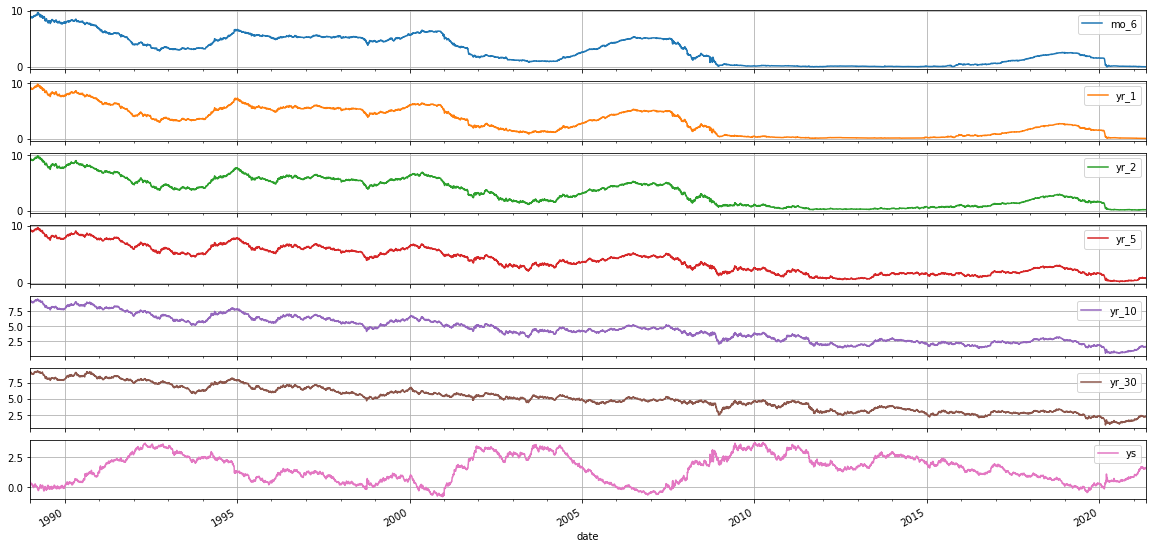

In [20]:
df.plot(subplots=True, grid=True)

(array([1071., 2152., 1911., 1987., 1323.]),
 array([-0.79 ,  0.116,  1.022,  1.928,  2.834,  3.74 ]),
 <BarContainer object of 5 artists>)

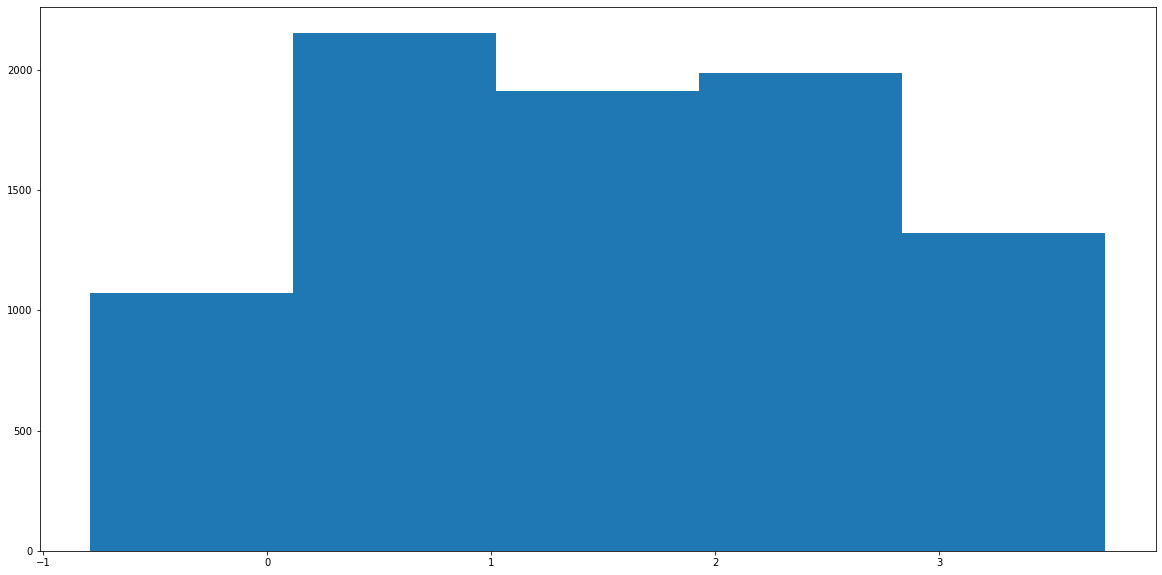

In [21]:
plt.hist(df['ys'], bins=5)

In [22]:
roll_mean = df['ys'].rolling(window=90, center=False).mean()
roll_std= df['ys'].rolling(window=90, center=False).std()

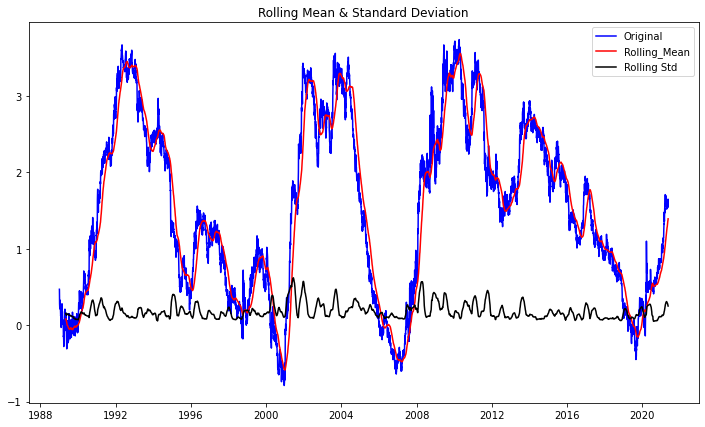

In [23]:
fig = plt.figure(figsize=(12,7))
plt.plot(df['ys'], color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling_Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

* The standard deviation doesn't seem to be too off.
* It's really hard to make a judgement based on this.

In [24]:
minus_rm = (df['ys'] - roll_mean).dropna()

In [25]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df['ys'])

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                   -2.263377
p-value                           0.184052
#Lags Used                       37.000000
Number of Observations Used    8406.000000
Critical Value (1%)              -3.431128
Critical Value (5%)              -2.861884
Critical Value (10%)             -2.566953
dtype: float64


* p-value is above 0.05, so we are not stationary

* Let's subract the rolling mean from the values

In [26]:
ys_month = df['ys'].resample('MS').mean()
ys_std = df['ys'].resample('MS').std()

In [27]:
minus_rm = (df['ys'] - roll_mean).dropna().resample('MS').mean()

In [28]:
ys_md = np.diff(ys_month)
ys_std = np.diff(ys_std)
ys_orig = np.array(ys_month)

date
1989-01-01    0.252727
1989-02-01    0.118500
1989-03-01   -0.040435
1989-04-01    0.003000
1989-05-01   -0.057391
                ...   
2021-01-01    0.982857
2021-02-01    1.198500
2021-03-01    1.558261
2021-04-01    1.595909
2021-05-01    1.586667
Freq: MS, Name: ys, Length: 389, dtype: float64

In [29]:
ys_md

array([-1.34227273e-01, -1.58934783e-01,  4.34347826e-02, -6.03913043e-02,
       -4.07905138e-02,  1.01991342e-01, -5.77225673e-02,  8.39130435e-02,
       -5.04545455e-02,  6.36363636e-03,  3.50432900e-02,  2.22960663e-01,
        1.08086957e-01, -4.33636364e-02,  2.03268398e-01,  5.28778468e-02,
       -1.30020704e-01,  1.06601732e-01,  4.45158103e-01,  2.04478261e-01,
       -1.30434783e-04, -1.84505929e-01,  5.17316017e-02,  4.51035197e-01,
        1.48869565e-01,  2.57714286e-01,  1.46558442e-01,  1.33379447e-01,
        6.43478261e-02,  3.82608696e-02, -3.18972332e-02, -9.30303030e-02,
        9.44927536e-02,  3.53126294e-01,  2.07683983e-01,  1.82233202e-01,
        2.56130435e-01, -5.56363636e-02,  2.69545455e-01,  2.62337662e-02,
       -1.40324675e-01,  9.53557312e-02, -1.87412008e-01,  9.75108225e-02,
        9.04545455e-02, -3.08225108e-02, -1.31469979e-01,  6.28985507e-02,
       -2.61333333e-01, -2.72434783e-01,  7.54347826e-02, -3.64285714e-02,
       -2.00389610e-01, -

In [30]:
dftest = adfuller(ys_md)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                -8.596624e+00
p-value                        7.049099e-14
#Lags Used                     2.000000e+00
Number of Observations Used    3.850000e+02
Critical Value (1%)           -3.447450e+00
Critical Value (5%)           -2.869077e+00
Critical Value (10%)          -2.570785e+00
dtype: float64


* We are definitely stationary now.  Let's plot this.

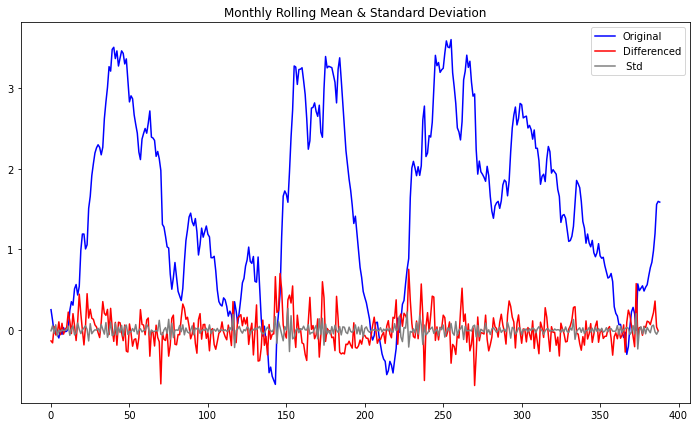

In [31]:
fig = plt.figure(figsize=(12,7))
plt.plot(ys_orig, color='blue', label='Original')
plt.plot(ys_md, color='red', label='Differenced')
plt.plot(ys_std, color='grey', label = ' Std')
plt.legend(loc='best')
plt.title('Monthly Rolling Mean & Standard Deviation')
plt.show(block=False)

### EWR

In [32]:
exp_roll_mean = df['ys'].ewm(halflife=45).mean()

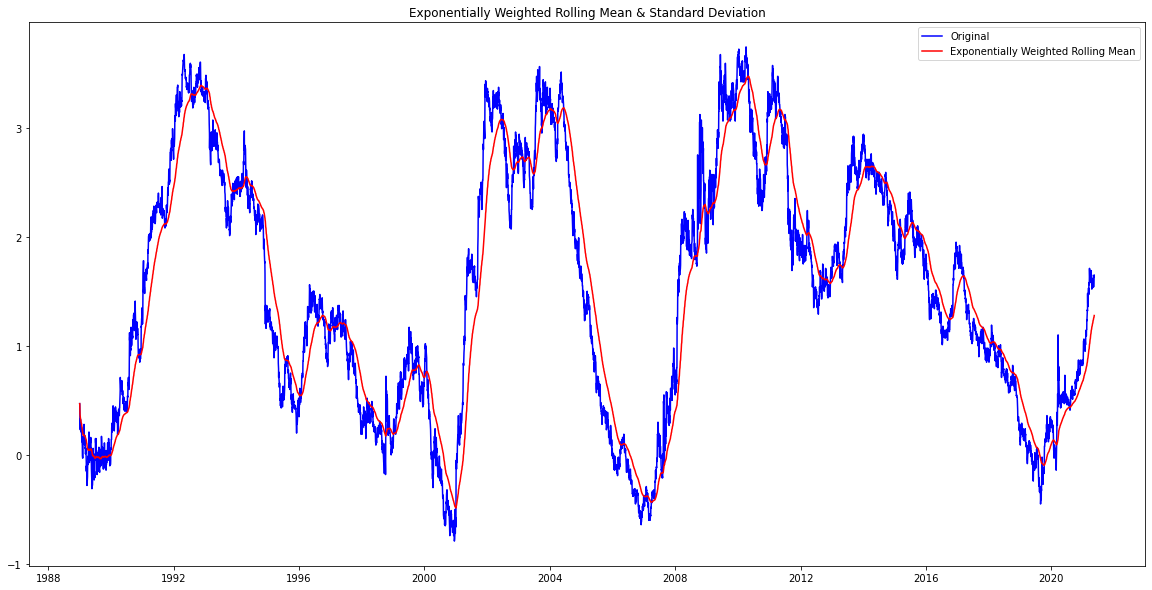

In [33]:

orig = plt.plot(df['ys'], color='blue',label='Original')
mean = plt.plot(exp_roll_mean, color='red', label='Exponentially Weighted Rolling Mean')
plt.legend(loc='best')
plt.title('Exponentially Weighted Rolling Mean & Standard Deviation')
plt.show(block=False)

In [34]:
minus_erm =(df['ys'] - exp_roll_mean).dropna()
minus_erm

date
1989-01-02    0.000000
1989-01-03   -0.004961
1989-01-04   -0.076049
1989-01-05   -0.093805
1989-01-06   -0.090338
                ...   
2021-05-07    0.303865
2021-05-10    0.328762
2021-05-11    0.333584
2021-05-12    0.377721
2021-05-13    0.352253
Name: ys, Length: 8444, dtype: float64

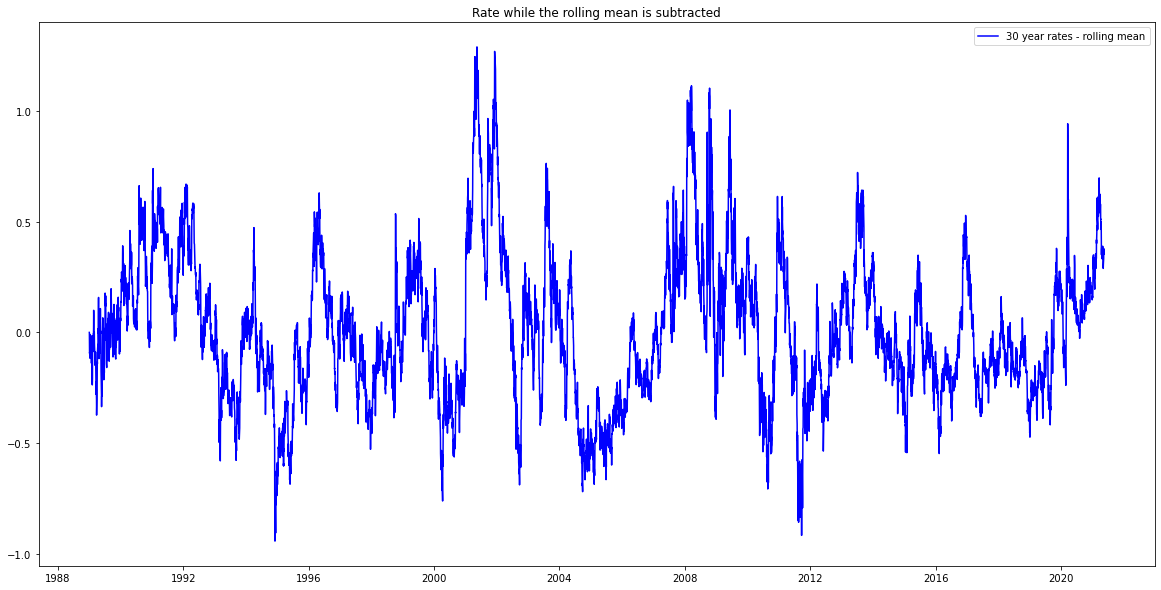

In [35]:
plt.plot(minus_erm, color='blue',label='30 year rates - rolling mean')
plt.legend(loc='best')
plt.title('Rate while the rolling mean is subtracted')
plt.show(block=False)

In [36]:
dts =minus_rm.groupby(pd.Grouper(freq='M'))

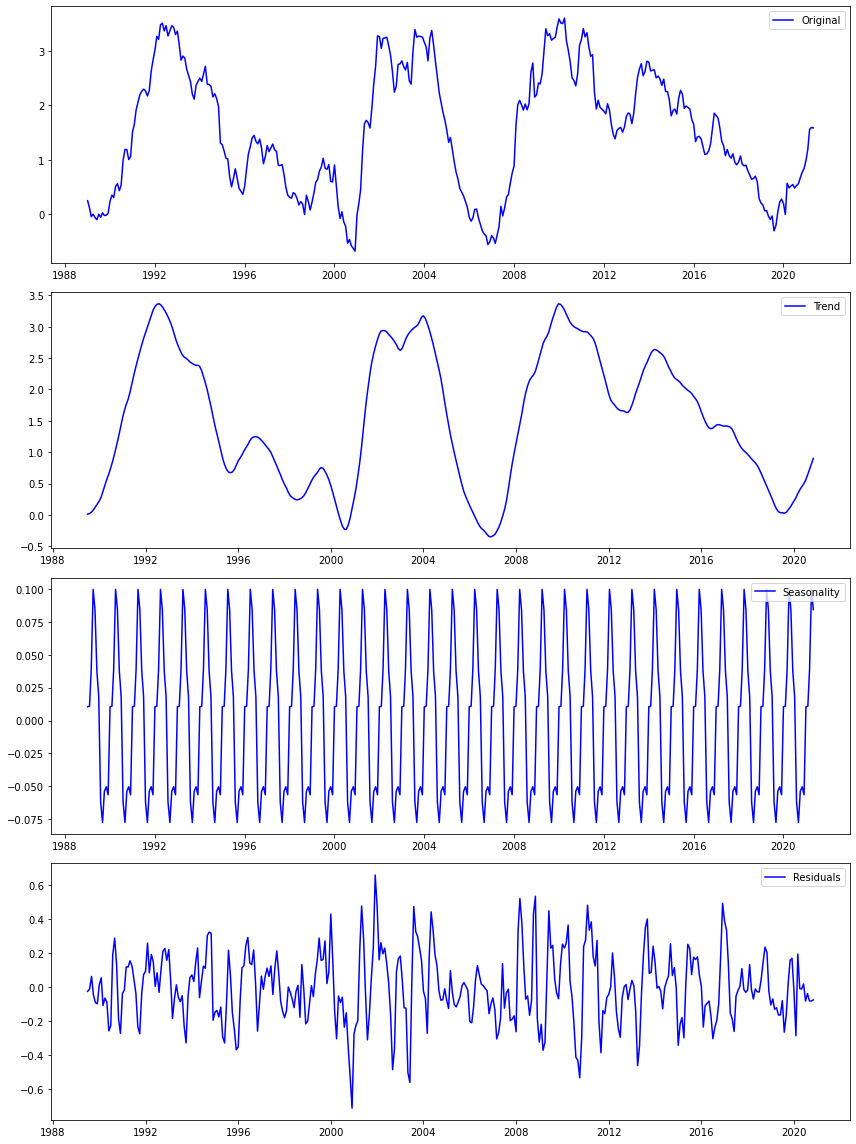

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose


decomposition = seasonal_decompose(ys_month)

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,16))
plt.subplot(411)
plt.plot(ys_month, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

<AxesSubplot:xlabel='date', ylabel='ys'>

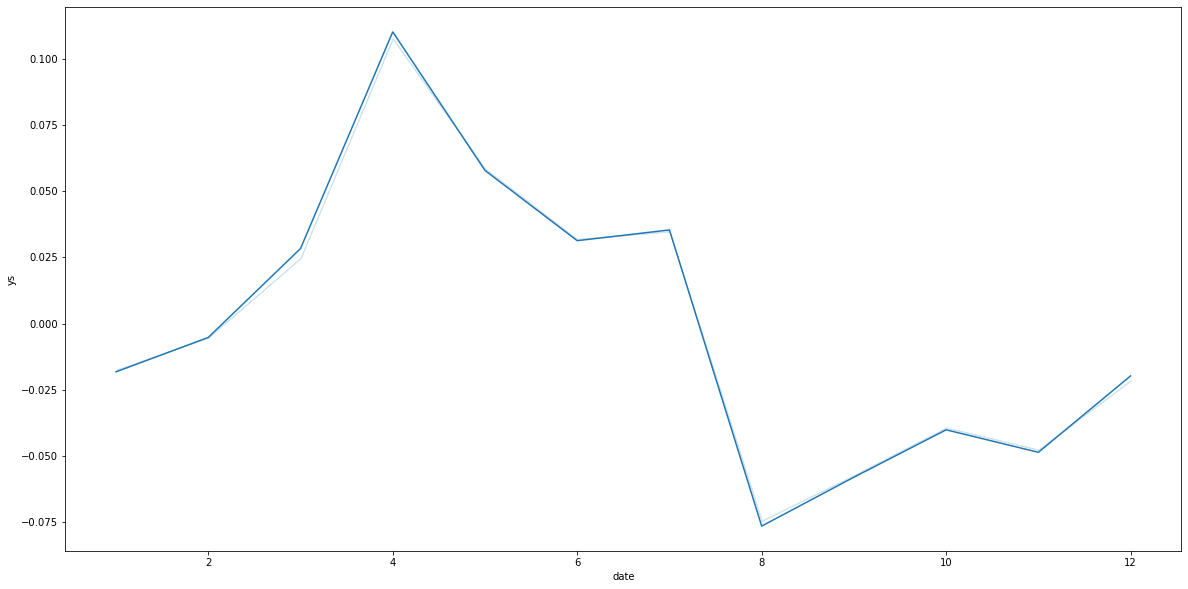

In [38]:
sns.lineplot(x=df.index.month, y=(df['ys']-df['ys'].mean()), ci=False)


<AxesSubplot:xlabel='date', ylabel='ys'>

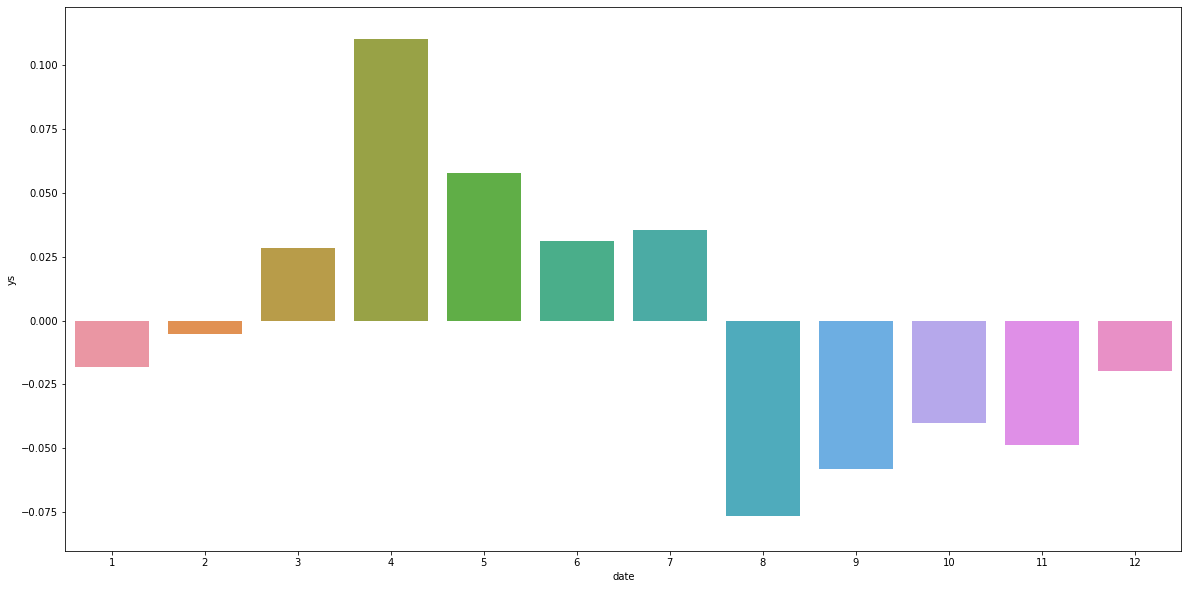

In [39]:
sns.barplot(x=df.index.month, y=(df['ys']-df['ys'].mean()), ci=False)

## Train Test Split

In [40]:
twenty = int(len(minus_rm) * 0.2)
train, test = minus_rm[:-twenty], minus_rm[-twenty:]

In [41]:
print(len(train))
print(len(test))

308
77


In [42]:
twenty

77

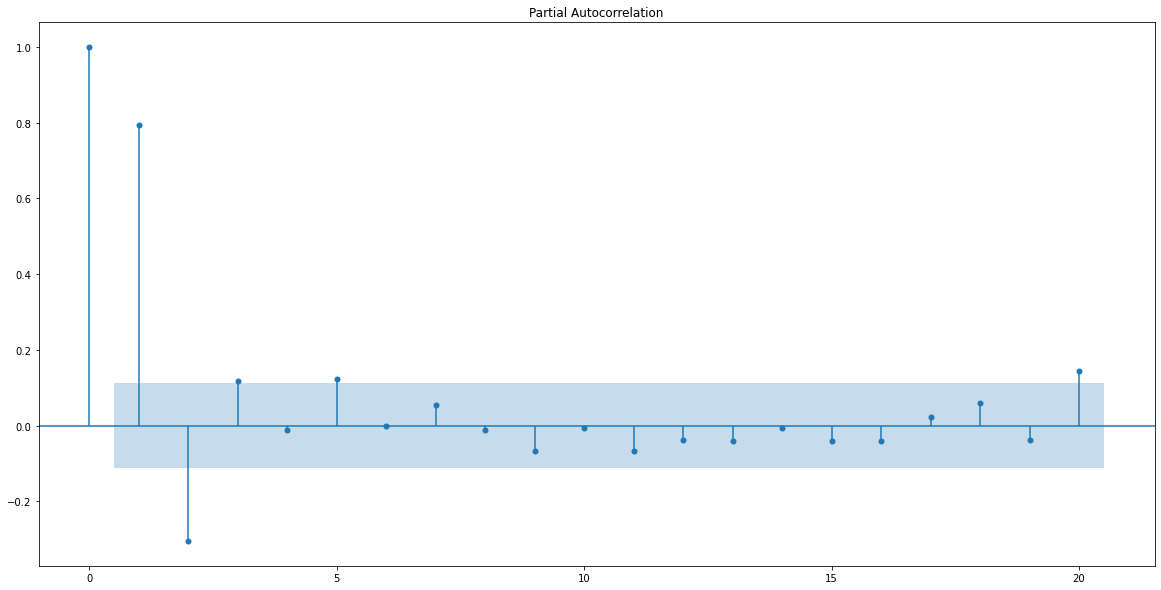

In [43]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

plot_pacf(train, lags=20);

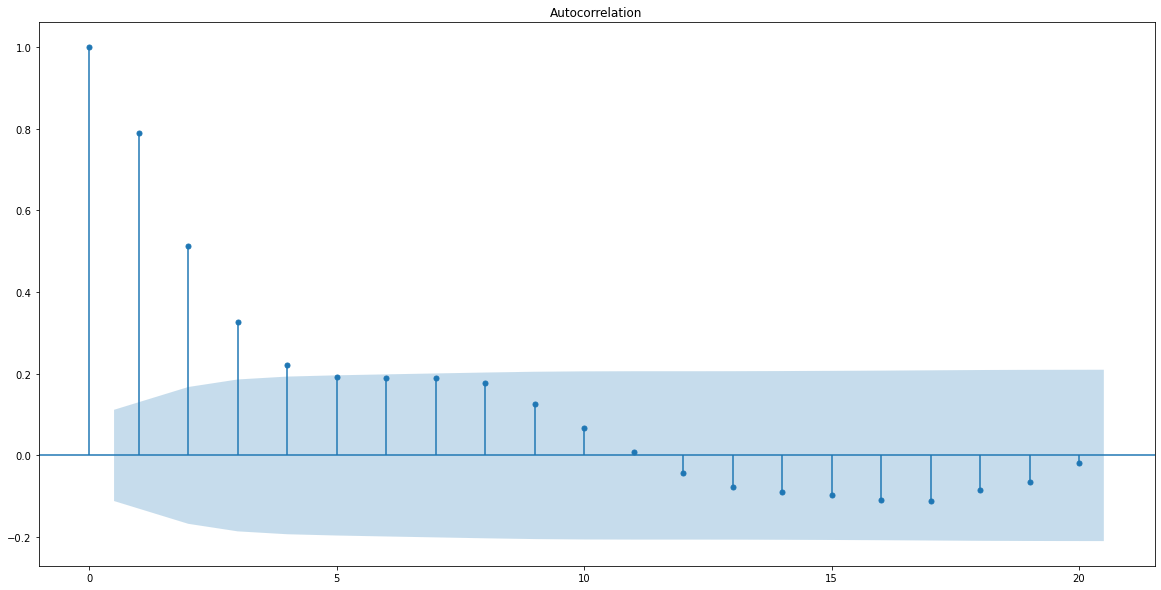

In [44]:
plot_acf(train, lags=20);

* Based on this, it looks like the p and q would be 3.

In [45]:
# Import ARMA
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm


In [48]:

p = q = (0,1,2,3)


combo, value = (None, None)
for ar in p:
    for ma in q:
        try:
            model = ARMA(np.asarray(train), order=(ar, ma)).fit()
            print('Combo:', (ar, ma),'AIC:', model.aic)

            if value is None or model.aic < value:
                combo, value = ((ar, ma), model.aic)
                print(f'\tBest Parameters Updated')
        except ValueError:
            pass
            
print(f'\n{"*"*20}\nOptimal ARMA order: {combo}') 


Combo: (0, 0) AIC: 128.40766093317083
	Best Parameters Updated
Combo: (0, 1) AIC: -109.62088281872798
	Best Parameters Updated
Combo: (0, 2) AIC: -168.25893654122933
	Best Parameters Updated
Combo: (0, 3) AIC: -194.81676533241125
	Best Parameters Updated
Combo: (1, 0) AIC: -171.3166309892281
Combo: (1, 1) AIC: -204.05439593501364
	Best Parameters Updated
Combo: (1, 2) AIC: -202.11721766458209
Combo: (1, 3) AIC: -200.903471314331
Combo: (2, 0) AIC: -198.59621139842397
Combo: (2, 1) AIC: -202.14359927953046
Combo: (2, 2) AIC: -200.4243534231132
Combo: (3, 0) AIC: -200.7620166621282
Combo: (3, 1) AIC: -200.7070381186727
Combo: (3, 2) AIC: -198.71932095267516
Combo: (3, 3) AIC: -202.57802195726504

********************
Optimal ARMA order: (1, 1)


* These are all so close together.
* Best performance is for (3,0), but there are only modest gains after (0,1)

In [47]:
test

date
2015-01-01   -0.392066
2015-02-01   -0.150433
2015-03-01   -0.059798
2015-04-01   -0.065561
2015-05-01    0.216804
                ...   
2021-01-01    0.222857
2021-02-01    0.330439
2021-03-01    0.526111
2021-04-01    0.360500
2021-05-01    0.225123
Freq: MS, Name: ys, Length: 77, dtype: float64

In [50]:
def run_arma(trn, tst, p, q):

    model = ARMA(np.asarray(trn), order=(p,q)).fit()
    print(model.summary())

    pred = model.forecast(steps=77)[0]
    mse =  round(mean_squared_error(tst, pred), 3)

    print(f'Mean Sqared Error for Test: {mse}')

    return model, pred, mse



In [51]:
model_1, pred_1, mse_1 =run_arma(train, test, 1,1)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  308
Model:                     ARMA(1, 1)   Log Likelihood                 106.027
Method:                       css-mle   S.D. of innovations              0.171
Date:                Tue, 18 May 2021   AIC                           -204.054
Time:                        14:35:48   BIC                           -189.134
Sample:                             0   HQIC                          -198.089
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0123      0.039      0.315      0.753      -0.064       0.089
ar.L1.y        0.6447      0.052     12.322      0.000       0.542       0.747
ma.L1.y        0.4315      0.064      6.691      0.0

In [58]:
test

date
2015-01-01   -0.392066
2015-02-01   -0.150433
2015-03-01   -0.059798
2015-04-01   -0.065561
2015-05-01    0.216804
                ...   
2021-01-01    0.222857
2021-02-01    0.330439
2021-03-01    0.526111
2021-04-01    0.360500
2021-05-01    0.225123
Freq: MS, Name: ys, Length: 77, dtype: float64

In [54]:
test

date
2015-01-01   -0.392066
2015-02-01   -0.150433
2015-03-01   -0.059798
2015-04-01   -0.065561
2015-05-01    0.216804
                ...   
2021-01-01    0.222857
2021-02-01    0.330439
2021-03-01    0.526111
2021-04-01    0.360500
2021-05-01    0.225123
Freq: MS, Name: ys, Length: 77, dtype: float64

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  308
Model:                     ARMA(3, 3)   Log Likelihood                 109.289
Method:                       css-mle   S.D. of innovations              0.168
Date:                Tue, 18 May 2021   AIC                           -202.578
Time:                        13:32:44   BIC                           -172.737
Sample:                             0   HQIC                          -190.646
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0124      0.039      0.321      0.748      -0.063       0.088
ar.L1.y       -0.2423      0.060     -4.062      0.000      -0.359      -0.125
ar.L2.y       -0.4033      0.048     -8.484      0.0

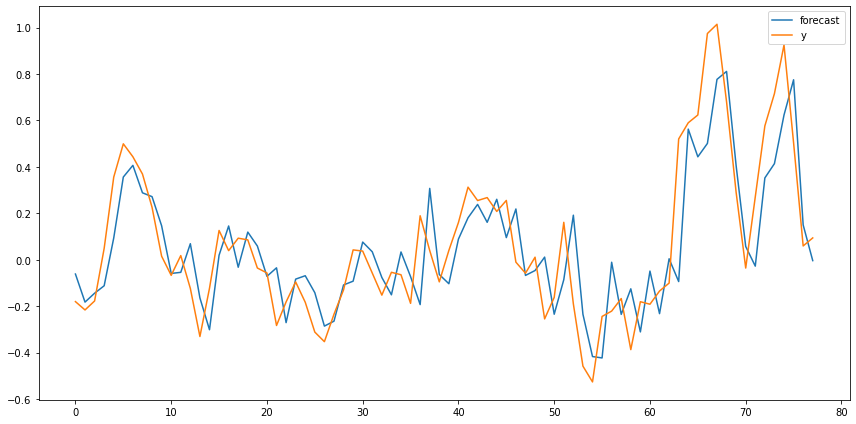

In [50]:
run_arma(train, test, 3,3)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  308
Model:                     ARMA(3, 2)   Log Likelihood                 106.360
Method:                       css-mle   S.D. of innovations              0.171
Date:                Tue, 18 May 2021   AIC                           -198.719
Time:                        13:32:44   BIC                           -172.609
Sample:                             0   HQIC                          -188.279
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0124      0.038      0.322      0.748      -0.063       0.088
ar.L1.y        0.3815      0.583      0.655      0.513      -0.760       1.523
ar.L2.y        0.2537      0.350      0.726      0.4

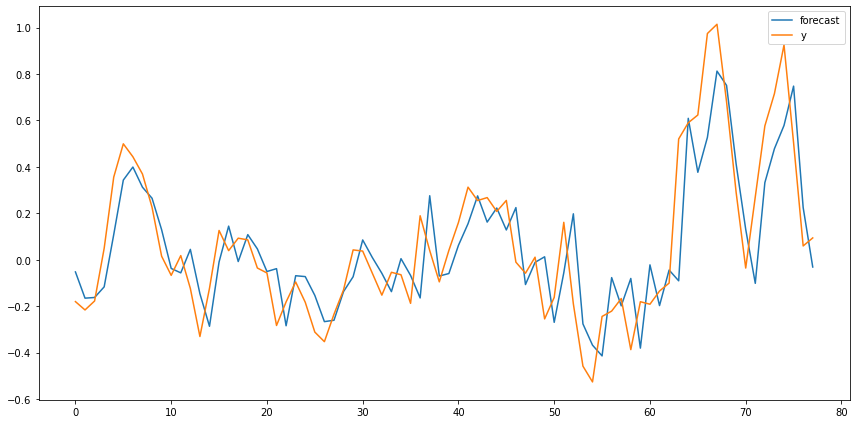

In [51]:
run_arma(train, test, 3, 2)

In [61]:
from statsmodels.tsa.arima_model import ARIMA

### Non stationary train test split

In [62]:
twenty = int(len(ys_month) * 0.2)
train, test = ys_month[:-twenty], ys_month[-twenty:]

In [63]:
p = d = q = (0,1,2,3)


combo, value = (None, None)
for ar in p:
    for ma in q:
        for diff in d:
            try:
                model = ARIMA(train, order=(ar, diff, ma)).fit()
                print('Combo:', (ar, diff, ma),'AIC:', model.aic)

                if value is None or model.aic < value:
                    combo, value = ((ar, diff, ma), model.aic)
                    print(f'\tBest Parameters Updated')
            except ValueError:
                pass
            
print(f'\n{"*"*20}\nOptimal ARIMA order: {combo}')

Combo: (0, 0, 0) AIC: 997.1651609835923
	Best Parameters Updated
Combo: (0, 1, 0) AIC: -88.46821303013576
	Best Parameters Updated
Combo: (0, 2, 0) AIC: 5.720813683951121
Combo: (0, 0, 1) AIC: 615.7773152665809
Combo: (0, 1, 1) AIC: -125.08657240097398
	Best Parameters Updated
Combo: (0, 2, 1) AIC: -93.98713568821051
Combo: (0, 1, 2) AIC: -123.50615583184822
Combo: (0, 2, 2) AIC: -116.69323646176997
Combo: (0, 1, 3) AIC: -126.0860080077955
	Best Parameters Updated
Combo: (0, 2, 3) AIC: -114.1003961216287
Combo: (1, 0, 0) AIC: -85.72864324066529
Combo: (1, 1, 0) AIC: -120.89132533221687
Combo: (1, 2, 0) AIC: -22.02362325532158
Combo: (1, 0, 1) AIC: -124.13670965690892
Combo: (1, 1, 1) AIC: -123.86794236841047
Combo: (1, 2, 1) AIC: -112.62648805843594
Combo: (1, 0, 2) AIC: -122.34311677149333
Combo: (1, 2, 2) AIC: -114.88285481236937
Combo: (1, 0, 3) AIC: -125.72064574439116
Combo: (1, 2, 3) AIC: -112.9042335752556
Combo: (2, 0, 0) AIC: -120.73742705590371
Combo: (2, 1, 0) AIC: -119.7549

In [87]:
arima_model = ARIMA(train, order=(3,0,2)).fit()
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                     ys   No. Observations:                  312
Model:                     ARMA(3, 2)   Log Likelihood                  75.485
Method:                       css-mle   S.D. of innovations              0.189
Date:                Tue, 18 May 2021   AIC                           -136.970
Time:                        15:04:14   BIC                           -110.769
Sample:                    01-01-1989   HQIC                          -126.498
                         - 12-01-2014                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6093      0.160     10.065      0.000       1.296       1.923
ar.L1.ys       1.6429      0.141     11.638      0.000       1.366       1.920
ar.L2.ys      -0.3380      0.273     -1.238      0.216      -0.873       0.197
ar.L3.ys      -0.3109      0.134     -2.321      0.020      -0.574      -0.048
ma.L1.ys      -0.3381      0.122     -2.766      0.006      -0.578      -0.099
ma.L2.ys      -0.5752      0.103     -5.584      0.000      -0.777      -0.373
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0139           -0.0676j            1.0161           -0.0106
AR.2            1.0139           +0.0676j            1.0161            0.0106
AR.3           -3.1149           -0.0000j            3.1149           -0.5000
MA.1            1.0570           +0.0000j            1.0570            0.0000
MA.2           -1.6447           +0.0000j            1.6447            0.5000
-----------------------------------------------------------------------------
"""

In [70]:
def get_MSE(model, trn, tst):
    pred = model.forecast(steps=len(tst))[0]
    mse_tst =  round(mean_squared_error(tst, pred), 3)

    print(mse_tst)

In [88]:
get_MSE(arima_model, train, test)

0.833


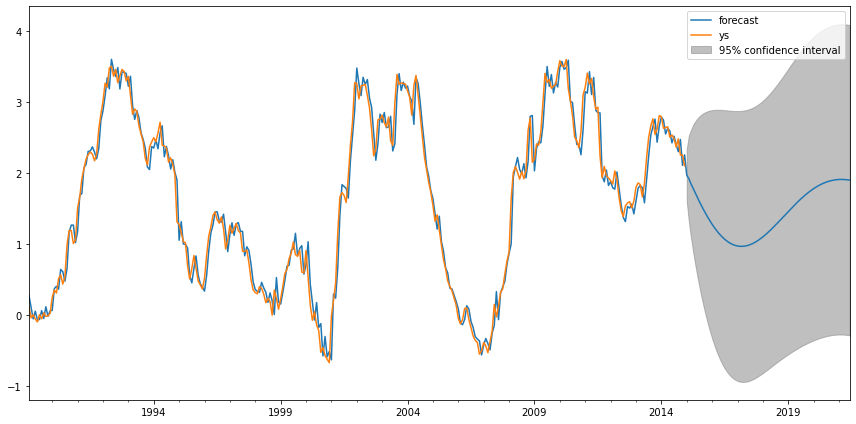

In [98]:
fig, ax = plt.subplots(figsize=(12, 6))
arima_model.plot_predict(1, len(train)+77, ax=ax)
fig.tight_layout()

In [85]:
arima_model = ARIMA(train, order=(2,0,3)).fit()
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                     ys   No. Observations:                  312
Model:                     ARMA(2, 3)   Log Likelihood                  75.172
Method:                       css-mle   S.D. of innovations              0.189
Date:                Tue, 18 May 2021   AIC                           -136.344
Time:                        15:04:00   BIC                           -110.143
Sample:                    01-01-1989   HQIC                          -125.872
                         - 12-01-2014                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6130      0.167      9.679      0.000       1.286       1.940
ar.L1.ys       1.9630      0.021     95.087      0.000       1.923       2.003
ar.L2.ys      -0.9678      0.020    -49.203      0.000      -1.006      -0.929
ma.L1.ys      -0.6525      0.060    -10.908      0.000      -0.770      -0.535
ma.L2.ys      -0.3791      0.068     -5.605      0.000      -0.512      -0.247
ma.L3.ys       0.1036      0.056      1.844      0.065      -0.007       0.214
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0141           -0.0691j            1.0165           -0.0108
AR.2            1.0141           +0.0691j            1.0165            0.0108
MA.1            1.0652           +0.0000j            1.0652            0.0000
MA.2           -1.9808           +0.0000j            1.9808            0.5000
MA.3            4.5769           +0.0000j            4.5769            0.0000
-----------------------------------------------------------------------------
"""

In [86]:
get_MSE(arima_model, train, test)

0.839


In [74]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [78]:
# Setting up parameter combinations.
p = q = (0, 1,2)
d = 0

pdq = [(ar, d, ma) for ar in p for ma in q]
pdqs = [(c[0], d, c[2], 12) for c in pdq]

# Iterate and try models.
combo, value = (None, None)
for pdq_combo in pdq:
    for pdqs_combo in pdqs:
        try:
            model = SARIMAX(
               np.asarray(train), 
               order=pdq_combo,
               seasonal_order=pdqs_combo,
               enforce_stationarity=False,
               enforce_invertibility=False
               )
            output = model.fit()

            if value is None or output.aic < value:
                combo, value = ((pdq_combo, pdqs_combo), output.aic)
                print('SARIMA Combos:', (pdq_combo, pdqs_combo),'AIC:', output.aic)
        except ValueError:
            pass      
            
print(f'\n{"*"*20}\nOptimal SARIMA order: {combo}')

SARIMA Combos: ((0, 0, 0), (0, 0, 0, 12)) AIC: 1324.077281972852
SARIMA Combos: ((0, 0, 0), (0, 0, 1, 12)) AIC: 1079.507717908941
SARIMA Combos: ((0, 0, 0), (0, 0, 2, 12)) AIC: 933.6806430121885
SARIMA Combos: ((0, 0, 0), (1, 0, 0, 12)) AIC: 920.61742554085
SARIMA Combos: ((0, 0, 0), (1, 0, 1, 12)) AIC: 914.7044754618782
SARIMA Combos: ((0, 0, 0), (1, 0, 2, 12)) AIC: 834.2214398657209
C:\Users\saifw\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\saifw\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
SARIMA Combos: ((0, 0, 0), (2, 0, 2, 12)) AIC: 826.7348109646395
SARIMA Combos: ((0, 0, 1), (0, 0, 1, 12)) AIC: 701.0753884351066
SA

In [100]:
 sari_model = SARIMAX(
    np.asarray(train), 
    order=(1, 0, 1),
    seasonal_order=(0, 0, 0, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
    ).fit()

print(sari_model.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  312
Model:               SARIMAX(1, 0, 1)   Log Likelihood                  65.288
Date:                Tue, 18 May 2021   AIC                           -124.576
Time:                        15:19:02   BIC                           -113.366
Sample:                             0   HQIC                          -120.095
                                - 312                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9927      0.008    132.064      0.000       0.978       1.007
ma.L1          0.3820      0.055      6.922      0.000       0.274       0.490
sigma2         0.0384      0.002     16.187      0.0

In [101]:
sari_pred = sari_model.forecast(steps=len(test))
sari_mse = round(mean_squared_error(test, sari_pred), 3)

In [102]:
sari_mse

0.532

In [110]:
test.index.min()

Timestamp('2015-01-01 00:00:00', freq='MS')

In [147]:
preds = sari_model.get_forecast( steps=150,
    dynamic=False)

In [142]:
preds.predicted_mean

array([2.0173758 , 2.00260019, 1.9879328 , 1.97337284, 1.95891951,
       1.94457205, 1.93032966, 1.91619159, 1.90215708, 1.88822535,
       1.87439566, 1.86066726, 1.84703941, 1.83351137, 1.82008242,
       1.80675182, 1.79351886, 1.78038281, 1.76734298, 1.75439866,
       1.74154914, 1.72879373, 1.71613174, 1.7035625 , 1.69108531,
       1.67869951, 1.66640442, 1.65419939, 1.64208374, 1.63005684,
       1.61811802, 1.60626664, 1.59450207, 1.58282366, 1.57123078,
       1.55972282, 1.54829914, 1.53695913, 1.52570217, 1.51452766,
       1.503435  , 1.49242358, 1.48149281, 1.4706421 , 1.45987087,
       1.44917852, 1.43856449, 1.42802819, 1.41756906, 1.40718654,
       1.39688006, 1.38664907, 1.37649301, 1.36641134, 1.35640351,
       1.34646897, 1.3366072 , 1.32681766, 1.31709982, 1.30745315,
       1.29787714, 1.28837126, 1.278935  , 1.26956786, 1.26026933,
       1.2510389 , 1.24187607, 1.23278036, 1.22375126, 1.21478829,
       1.20589097, 1.19705882, 1.18829135, 1.1795881 , 1.17094

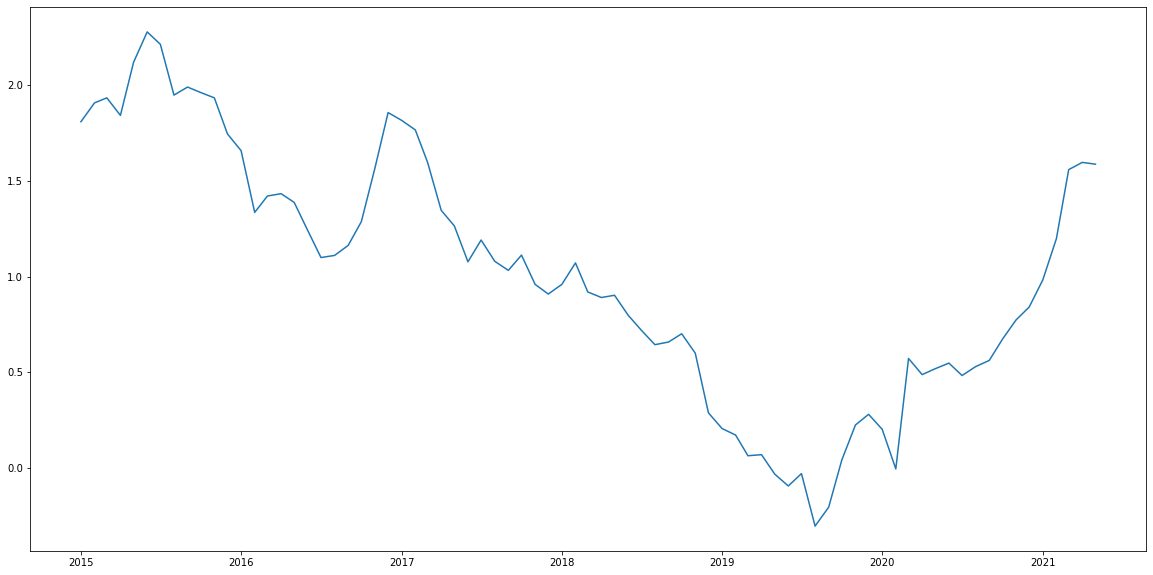

In [145]:
plt.plot(test)

In [138]:
dr = pd.date_range(start='2015', periods=77, freq='M')

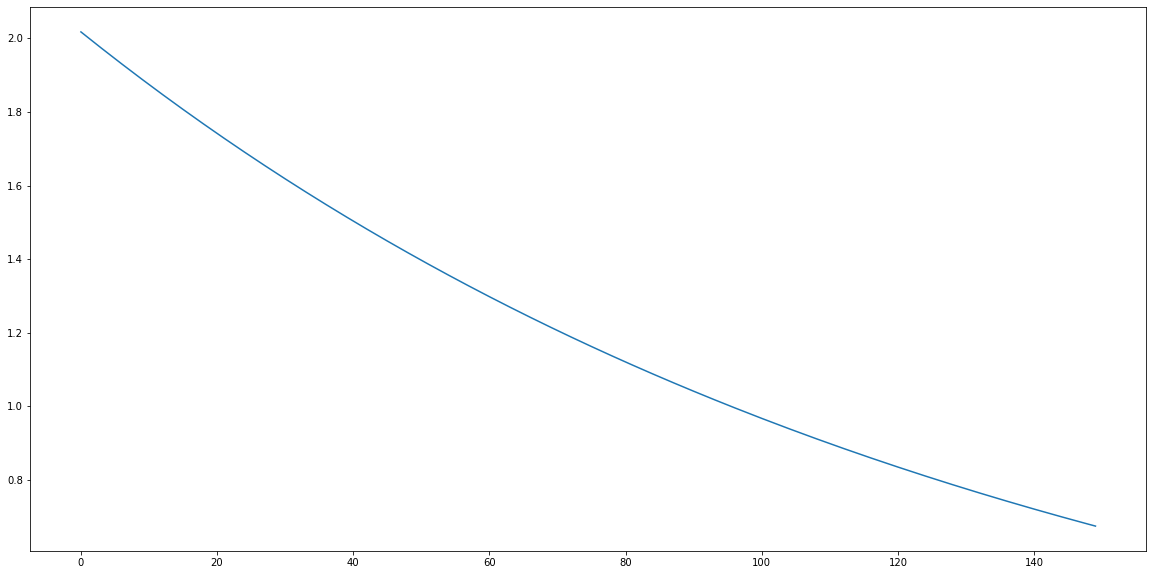

In [148]:
plt.plot(preds.predicted_mean )

In [64]:
minus_rm

date
1989-05-01   -0.123825
1989-06-01   -0.080919
1989-07-01    0.054106
1989-08-01   -0.012444
1989-09-01    0.083270
                ...   
2021-01-01    0.222857
2021-02-01    0.330439
2021-03-01    0.526111
2021-04-01    0.360500
2021-05-01    0.225123
Freq: MS, Name: ys, Length: 385, dtype: float64

# RNN

In [217]:
ml_data = df['ys']
p_60 = int(len(ml_data) * 0.6)
p_80 = int(len(ml_data) * 0.8)

train = ml_data[:p_60]
val = ml_data[p_60:p_80]
test = ml_data[p_80:]

In [218]:
X_train, y_train = (train), (train.shift(-1, freq='MS'))
X_val, y_val =(val), (val.shift(-1, freq='MS'))
X_test, y_test =(test), (test.shift(-1, freq='MS'))

In [219]:
X_train, y_train = np.array(X_train[:-1]), np.array(y_train[1:])
X_val, y_val =  np.array(X_val[:-1]), np.array(y_val[1:])
X_test, y_test = np.array(X_test[:-1]), np.array(y_test[1:])

In [220]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, 1))
X_test = np.reshape(X_test, (X_test.shape[0], 1, 1))
X_val = np.reshape(X_val, (X_val.shape[0], 1, 1))
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(5065, 1, 1)
(1688, 1, 1)
(1688, 1, 1)


In [221]:
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras import optimizers
import tensorflow as tf

In [227]:
batch_size = 1
look_back = 1
model = Sequential()
model.add(LSTM(6, batch_input_shape=(batch_size, look_back, 1),
                return_sequences=True, stateful=True))
model.add(LSTM(6, return_sequences=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val),
                    epochs=50, batch_size=batch_size, verbose=2, shuffle=True)

Epoch 1/50
5065/5065 - 9s - loss: 0.1703 - val_loss: 0.0074
Epoch 2/50
5065/5065 - 8s - loss: 0.0058 - val_loss: 0.0101
Epoch 3/50
5065/5065 - 8s - loss: 0.0045 - val_loss: 0.0049
Epoch 4/50
5065/5065 - 8s - loss: 0.0041 - val_loss: 0.0054
Epoch 5/50
5065/5065 - 8s - loss: 0.0040 - val_loss: 0.0045
Epoch 6/50
5065/5065 - 8s - loss: 0.0039 - val_loss: 0.0046
Epoch 7/50
5065/5065 - 8s - loss: 0.0039 - val_loss: 0.0055
Epoch 8/50
5065/5065 - 8s - loss: 0.0038 - val_loss: 0.0056
Epoch 9/50
5065/5065 - 8s - loss: 0.0037 - val_loss: 0.0045
Epoch 10/50
5065/5065 - 8s - loss: 0.0039 - val_loss: 0.0045
Epoch 11/50
5065/5065 - 8s - loss: 0.0037 - val_loss: 0.0045
Epoch 12/50
5065/5065 - 8s - loss: 0.0037 - val_loss: 0.0057
Epoch 13/50
5065/5065 - 8s - loss: 0.0036 - val_loss: 0.0046
Epoch 14/50
5065/5065 - 8s - loss: 0.0037 - val_loss: 0.0044
Epoch 15/50
5065/5065 - 8s - loss: 0.0036 - val_loss: 0.0046
Epoch 16/50
5065/5065 - 8s - loss: 0.0036 - val_loss: 0.0077
Epoch 17/50
5065/5065 - 8s - loss

KeyboardInterrupt: 

Train: 0.048, Test: 0.024


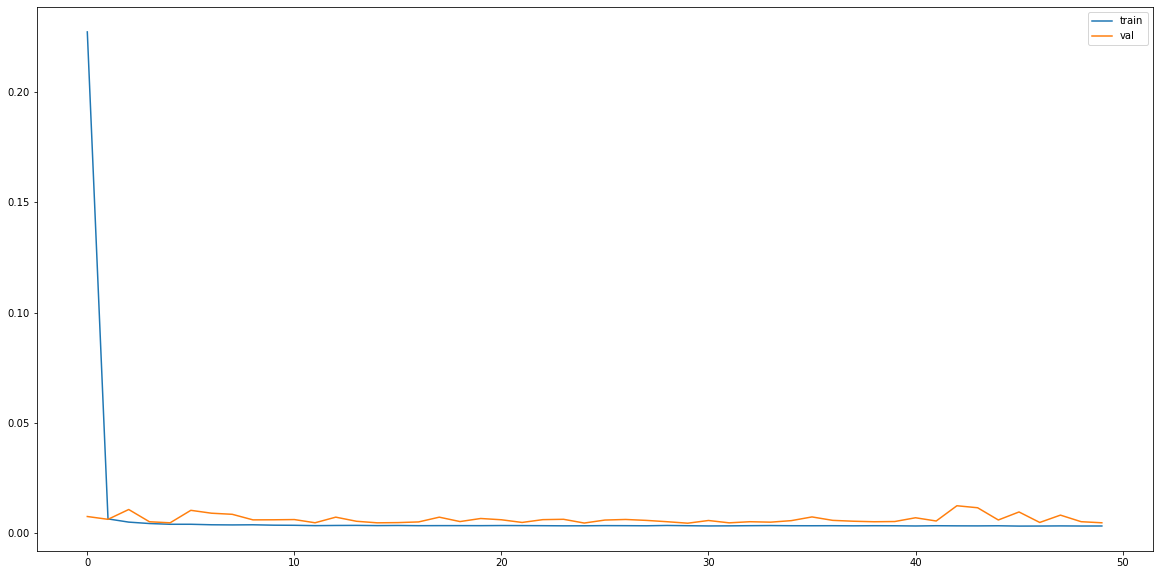

In [224]:
train_acc = model.evaluate(X_train, y_train, verbose=0)
test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [ ]:
testPredict = model.predict(X_test, batch_size=batch_size)
trainPredict = model.predict(X_train, batch_size=batch_size)